## Pr√©sentation du projet ‚Äì Mod√©lisation du risque de cr√©dit

La mod√©lisation du risque de cr√©dit constitue l'un des piliers fondamentaux des accords de B√¢le et de la gestion globale des risques financiers. Elle vise √† √©valuer et √† ma√Ætriser le risque de non-respect des engagements de remboursement par les emprunteurs.


L'objectif principal de cette mod√©lisation est d'estimer l'encours expos√© au risque et de d√©terminer le niveau de couverture n√©cessaire pour permettre aux institutions financi√®res de s√©curiser leur portefeuille de cr√©dits.

Ce processus repose sur plusieurs √©tapes cl√©s, dont la plus cruciale est la d√©termination de la probabilit√© de d√©faut (PD) de l'emprunteur. Cette √©valuation est ensuite combin√©e √† la perte en cas de d√©faut (LGD) et √† l‚Äôexposition au moment du d√©faut (EAD) pour calculer la perte attendue sur les portefeuilles de cr√©dits.

Ces param√®tres sont √©galement essentiels dans le cadre du calcul des provisions selon les normes IFRS9, int√©grant la dimension prospective (¬´ forward-looking ¬ª) pour anticiper les d√©gradations √©conomiques futures.

Ainsi, la mod√©lisation du risque de cr√©dit permet non seulement d'estimer les pertes potentielles mais aussi de renforcer la solidit√© financi√®re des √©tablissements en assurant une couverture ad√©quate des risques li√©s au cr√©dit.

Ainsi, nous allons d√©ployer les diff√©rentes √©tapes de la mod√©lisation du risque de cr√©dit. Une fois le mod√®le √©tabli et les pr√©visions de probabilit√©s de d√©faut (PD) r√©alis√©es, nous proc√©derons au calcul des principales m√©triques de risque : la perte attendue (Expected Loss - EL), la perte attendue comptable selon les normes IFRS9 (Expected Credit Loss - ECL) ainsi que la Value at Risk (VaR).

In [ ]:
# import des differents libraires pour le projets : 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import sklearn  

! pip install imbalanced-learn 
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import sklearn.model_selection
from sklearn.metrics import roc_curve, auc


In [2]:
# import de donn√©es  : 

df = pd.read_csv("/workspaces/credit-risk-/data.csv")

In [3]:
# liste des differentes variables 

df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
# presentation 

df.sample(10)

person_age  person_income person_home_ownership  person_emp_length  \
8755           23          37440                  RENT                8.0   
12392          22          80070              MORTGAGE                6.0   
12259          25          80000              MORTGAGE                5.0   
8015           23          55000              MORTGAGE                2.0   
23917          34          26000                  RENT                2.0   
24853          27         102000                  RENT                2.0   
30201          36          49000                   OWN                NaN   
30042          36          26000                  RENT                NaN   
24611          29          63000                  RENT               13.0   
30849          37          24000                  RENT                5.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
8755           EDUCATION          E       8000          14.18            0   
12392          EDUCATION          B      27525          10.74            0   
12259          EDUCATION          B      25000          10.36            0   
8015           EDUCATION          A       7000           8.59            0   
23917            VENTURE          B      10000          12.42            1   
24853    HOMEIMPROVEMENT          A      10150            NaN            0   
30201           PERSONAL          D       4200          16.02            0   
30042  DEBTCONSOLIDATION          B       8500          10.62            1   
24611            MEDICAL          A      10000           7.49            0   
30849  DEBTCONSOLIDATION          B      10000           9.76            1   

       loan_percent_income cb_person_default_on_file  \
8755                  0.21                         N   
12392                 0.34                         N   
12259                 0.31                         N   
8015                  0.13                         N   
23917                 0.38                         N   
24853                 0.10                         N   
30201                 0.09                         Y   
30042                 0.33                         N   
24611                 0.16                         N   
30849                 0.42                         N   

       cb_person_cred_hist_length  
8755                            2  
12392                           3  
12259                           3  
8015                            2  
23917                           7  
24853                           6  
30201                          13  
30042                          14  
24611                           8  
30849                          13

In [ ]:
# presentation 
df.describe()

person_age  person_income  person_emp_length     loan_amnt  \
count  32581.000000   3.258100e+04       31686.000000  32581.000000   
mean      27.734600   6.607485e+04           4.789686   9589.371106   
std        6.348078   6.198312e+04           4.142630   6322.086646   
min       20.000000   4.000000e+03           0.000000    500.000000   
25%       23.000000   3.850000e+04           2.000000   5000.000000   
50%       26.000000   5.500000e+04           4.000000   8000.000000   
75%       30.000000   7.920000e+04           7.000000  12200.000000   
max      144.000000   6.000000e+06         123.000000  35000.000000   

       loan_int_rate   loan_status  loan_percent_income  \
count   29465.000000  32581.000000         32581.000000   
mean       11.011695      0.218164             0.170203   
std         3.240459      0.413006             0.106782   
min         5.420000      0.000000             0.000000   
25%         7.900000      0.000000             0.090000   
50%        10.990000      0.000000             0.150000   
75%        13.470000      0.000000             0.230000   
max        23.220000      1.000000             0.830000   

       cb_person_cred_hist_length  
count                32581.000000  
mean                     5.804211  
std                      4.055001  
min                      2.000000  
25%                      3.000000  
50%                      4.000000  
75%                      8.000000  
max                     30.000000

In [ ]:
# presentation 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Description des diff√©rentes variavles : 


Le jeu de donn√©es comporte 12 variables et 32 581 observations, chacune repr√©sentant une personne ayant contract√© un pr√™t. Les variables se divisent en deux cat√©gories : celles qui d√©crivent les caract√©ristiques du pr√™t (montant, taux d‚Äôint√©r√™t, statut, etc.) et celles qui d√©crivent le profil de l‚Äôemprunteur (√¢ge, revenu, situation professionnelle, etc.).

L‚Äôobjectif est d‚Äôutiliser ces donn√©es historiques pour construire un mod√®le de scoring capable de pr√©dire la probabilit√© de d√©faut pour de nouveaux candidats √† un cr√©dit.
Avant d‚Äôentamer la mod√©lisation, il est essentiel de bien comprendre les variables √† notre disposition :

**person_age** : √¢ge de l‚Äôemprunteur ;

**person_income** : revenu annuel (ou salaire) de l‚Äôemprunteur ;

**person_home_ownership** : statut de logement (propri√©taire, locataire, etc.) ;


**person_emp_length** : anciennet√© professionnelle (en mois) ;


**loan_intent** : objet ou finalit√© du cr√©dit (voiture, √©ducation, etc.) ;


**loan_grade** : notation de la solvabilit√©, de A (meilleure) √† G (plus risqu√©e) ;


**loan_amnt** : montant total du pr√™t ;


**loan_int_rate** : taux d‚Äôint√©r√™t appliqu√© au pr√™t ;


**loan_status** : variable cible, indiquant un d√©faut de paiement (1) ou non (0) ;


**loan_percent_income** : part du cr√©dit par rapport au revenu (ratio dette/revenu) ;


**cb_person_default_on_file** : d√©faut de paiement pass√© enregistr√© ou non ;


**cb_person_cred_hist_length** : dur√©e de l‚Äôhistorique de cr√©dit.


Nous allons maintenant passer √† l‚Äôanalyse exploratoire des donn√©es (EDA) afin de mieux comprendre la structure du dataset, d√©tecter les √©ventuelles anomalies et identifier les relations cl√©s entre les variables.

loan_status
0    0.781836
1    0.218164
Name: proportion, dtype: float64


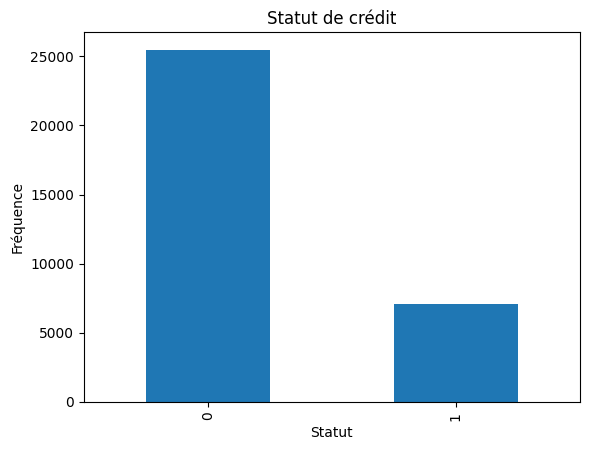

In [ ]:
# Transformation de la variable cible en variable cat√©gorielle

df['loan_status'] = df['loan_status'].astype('category')

# Table de fr√©quence de la variable cible ('loan_status')
freq_table = df['loan_status'].value_counts(normalize=True)
print(freq_table)

# Diagramme √† barres de la variable 'loan_status'
df['loan_status'].value_counts().plot(kind='bar')
plt.title("Statut de cr√©dit")
plt.xlabel("Statut")
plt.ylabel("Fr√©quence")
plt.show()

Comme on peut le constater, nos donn√©es pr√©sentent un d√©s√©quilibre important entre les classes : environ 78 % des observations correspondent √† des cas de non-d√©faut, contre 22 % de d√©fauts. Ce type de d√©s√©quilibre est fr√©quent dans les jeux de donn√©es li√©s au cr√©dit. En effet, la majorit√© des emprunteurs ont tout int√©r√™t √† honorer leurs engagements : un remboursement r√©gulier am√©liore leur cote de cr√©dit, ce qui leur permet ensuite d‚Äôacc√©der plus facilement √† de nouveaux financements pour d'autres projets.


Si ce d√©s√©quilibre est coh√©rent avec la r√©alit√© du domaine, il constitue n√©anmoins un v√©ritable d√©fi pour les algorithmes de classification en Machine Learning. Une mauvaise prise en compte de cette distribution peut conduire √† des mod√®les biais√©s, favorisant excessivement la classe majoritaire.


Il sera donc essentiel, lors de la phase de pr√©paration des donn√©es √† la mod√©lisation, de mettre en ≈ìuvre des techniques permettant de corriger ce d√©s√©quilibre afin d‚Äôassurer des performances √©quilibr√©es sur les deux classes.

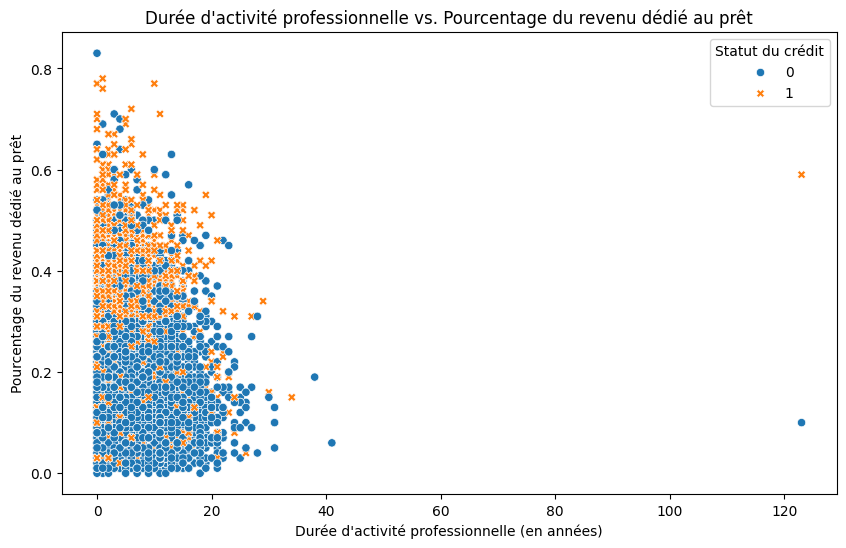

In [ ]:
# Nuage de points avec couleur et forme selon 'loan_status'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='person_emp_length', 
                y='loan_percent_income',
                hue='loan_status', 
                style='loan_status')

plt.title("Dur√©e d'activit√© professionnelle vs. Pourcentage du revenu d√©di√© au pr√™t")
plt.xlabel("Dur√©e d'activit√© professionnelle (en ann√©es)")
plt.ylabel("Pourcentage du revenu d√©di√© au pr√™t")
plt.legend(title="Statut du cr√©dit")
plt.show()

/tmp/ipykernel_2307/3007913521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_percent_income', palette='Set2')


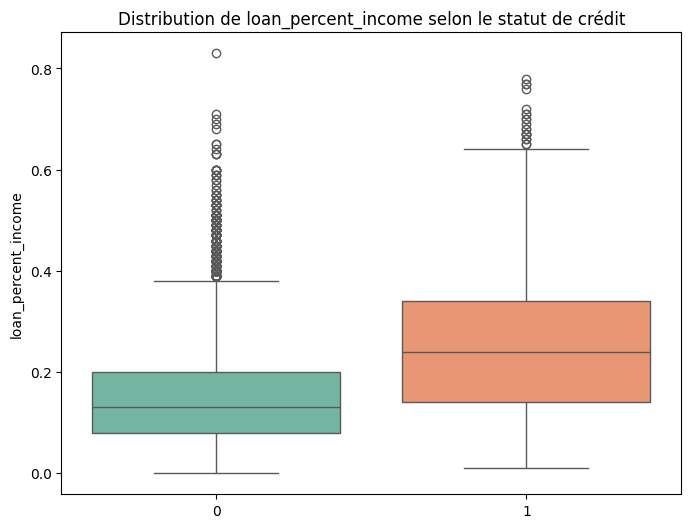

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='loan_status', y='loan_percent_income', palette='Set2')

plt.xlabel("")  
plt.ylabel("loan_percent_income")
plt.title("Distribution de loan_percent_income selon le statut de cr√©dit")
plt.show()

In [10]:
# fonction : 
def show_relation(data, feature, title_y):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')
    plt.xlabel("")
    plt.ylabel(title_y)
    plt.title(f"{title_y} selon le statut de cr√©dit")
    plt.show()

/tmp/ipykernel_2307/2706058644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')


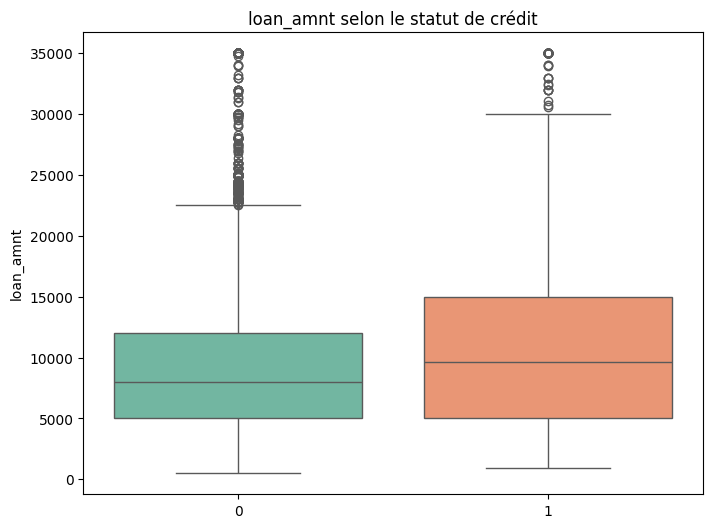

In [11]:
show_relation(df, 'loan_amnt', 'loan_amnt')

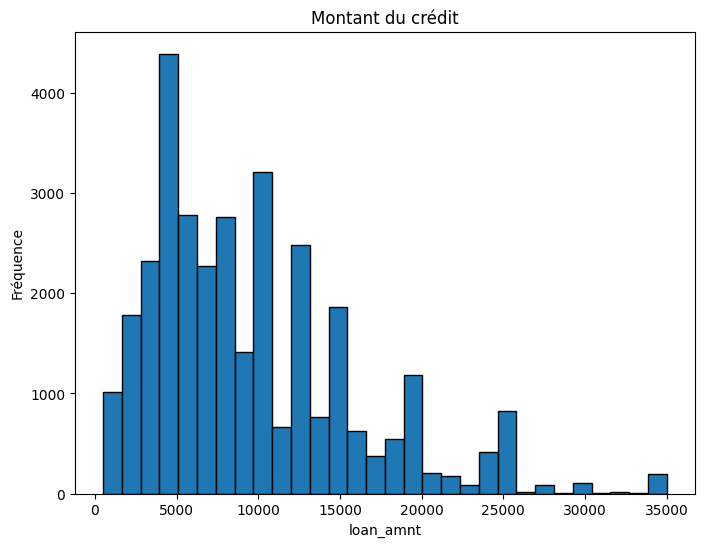

In [12]:
plt.figure(figsize=(8, 6))
plt.hist(df['loan_amnt'], bins=30, edgecolor='black')
plt.title("Montant du cr√©dit")
plt.xlabel("loan_amnt")
plt.ylabel("Fr√©quence")
plt.show()

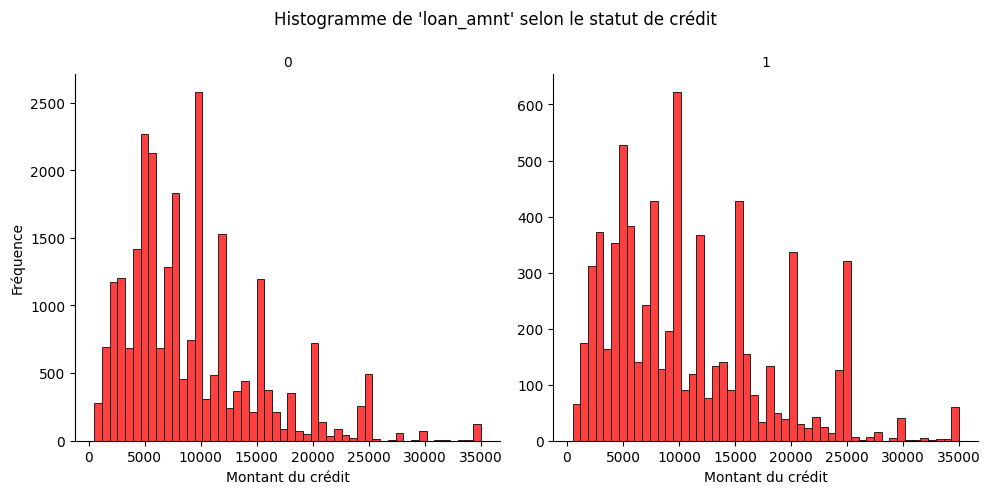

In [ ]:
# Cr√©ation des facettes avec seaborn

g = sns.displot(
    data=df,
    x='loan_amnt',
    col='loan_status',
    bins=50,
    color='red',
    facet_kws={'sharey': False, 'sharex': False}
)

# Personnalisation
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Montant du cr√©dit", "Fr√©quence")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Histogramme de 'loan_amnt' selon le statut de cr√©dit")
plt.show()

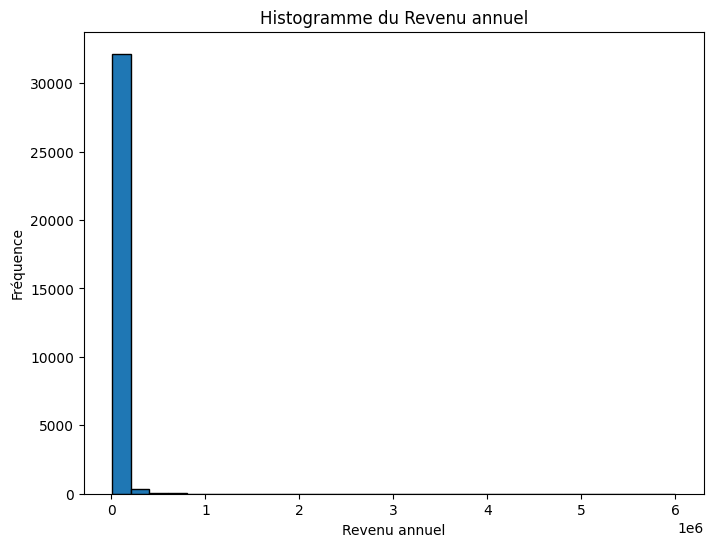

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(df['person_income'], bins=30, edgecolor='black')
plt.title("Histogramme du Revenu annuel")
plt.xlabel("Revenu annuel")
plt.ylabel("Fr√©quence")
plt.show()

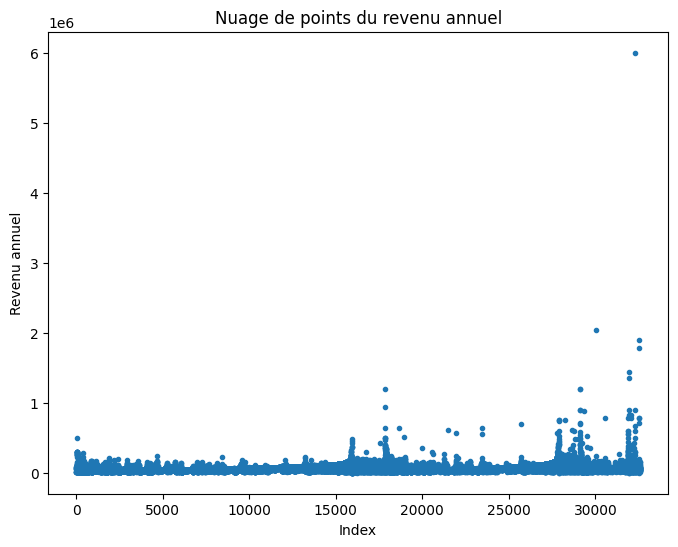

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(df['person_income'], 'o', markersize=3)  # 'o' pour les points
plt.ylabel("Revenu annuel")
plt.xlabel("Index")
plt.title("Nuage de points du revenu annuel")
plt.show()

/tmp/ipykernel_2307/2706058644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')


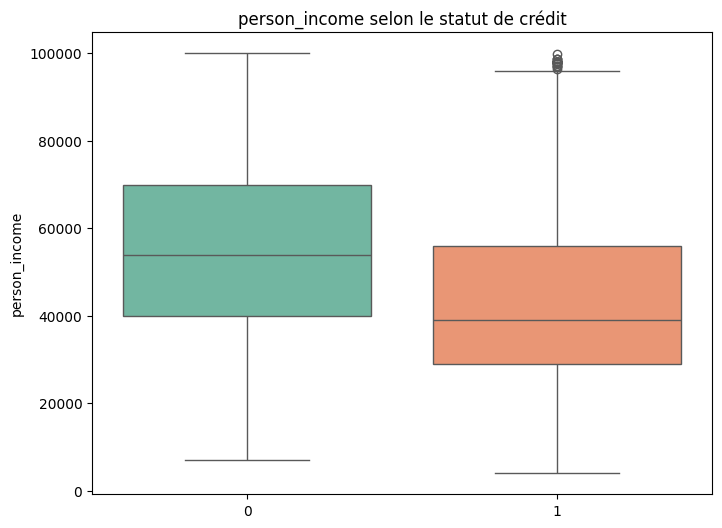

In [16]:
# Filtrage des donn√©es
filtered_df = df[df['person_income'] < 100000]

# Utilisation de la fonction show_relation
show_relation(filtered_df, 'person_income', 'person_income')


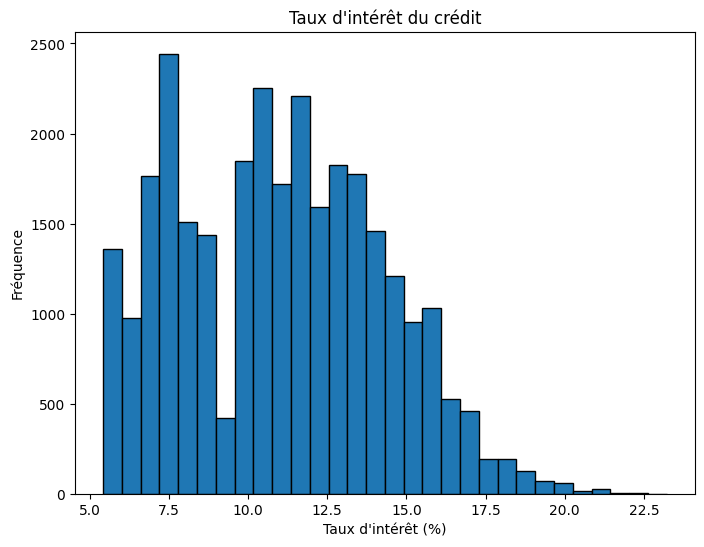

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df['loan_int_rate'], bins=30, edgecolor='black')
plt.title("Taux d'int√©r√™t du cr√©dit")
plt.xlabel("Taux d'int√©r√™t (%)")
plt.ylabel("Fr√©quence")
plt.show()

/tmp/ipykernel_2307/2706058644.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='loan_status', y=feature, palette='Set2')


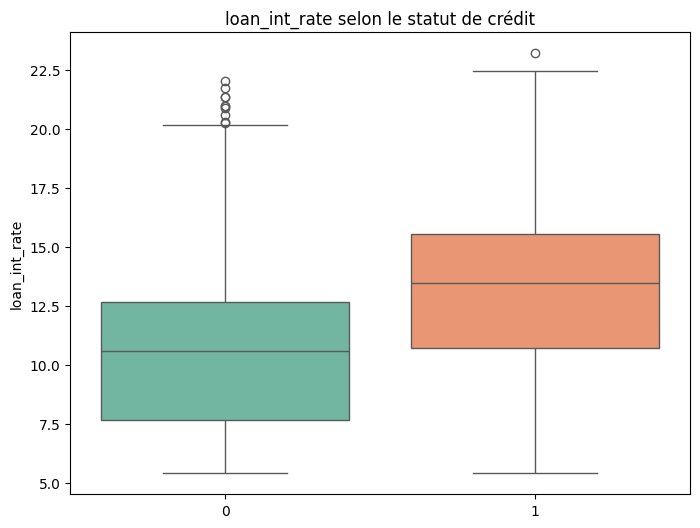

In [18]:
show_relation(df, 'loan_int_rate', 'loan_int_rate')

/tmp/ipykernel_2307/3186612072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='person_home_ownership', palette='pastel')


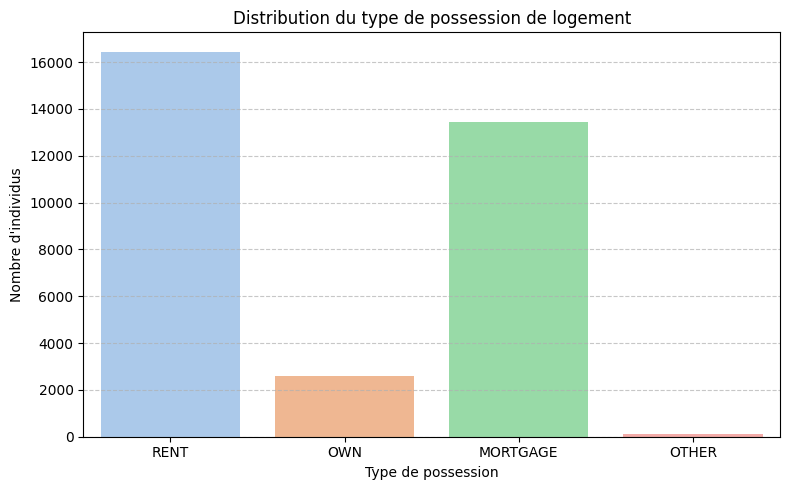

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='person_home_ownership', palette='pastel')

plt.title("Distribution du type de possession de logement")
plt.xlabel("Type de possession")
plt.ylabel("Nombre d'individus")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

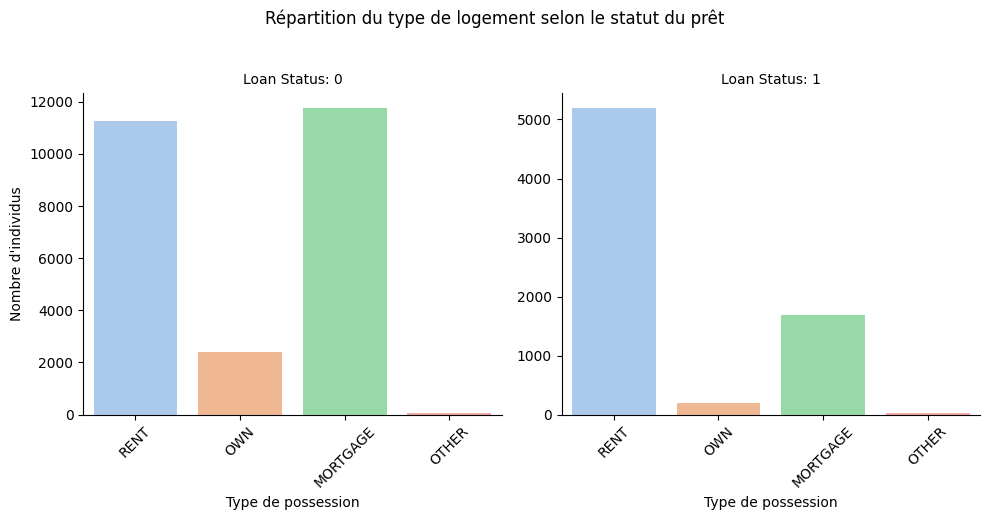

In [20]:
g = sns.catplot(
    data=df,
    x="person_home_ownership",
    kind="count",
    hue="person_home_ownership",
    col="loan_status",
    col_wrap=2,          # Comme ncol=2 dans ggplot2
    palette="pastel",
    sharey=False         # scales = "free"
)

g.set_titles("Loan Status: {col_name}")
g.set_axis_labels("Type de possession", "Nombre d'individus")
g.set_xticklabels(rotation=45)
g.fig.suptitle("R√©partition du type de logement selon le statut du pr√™t", y=1.03)

plt.tight_layout()
plt.show()

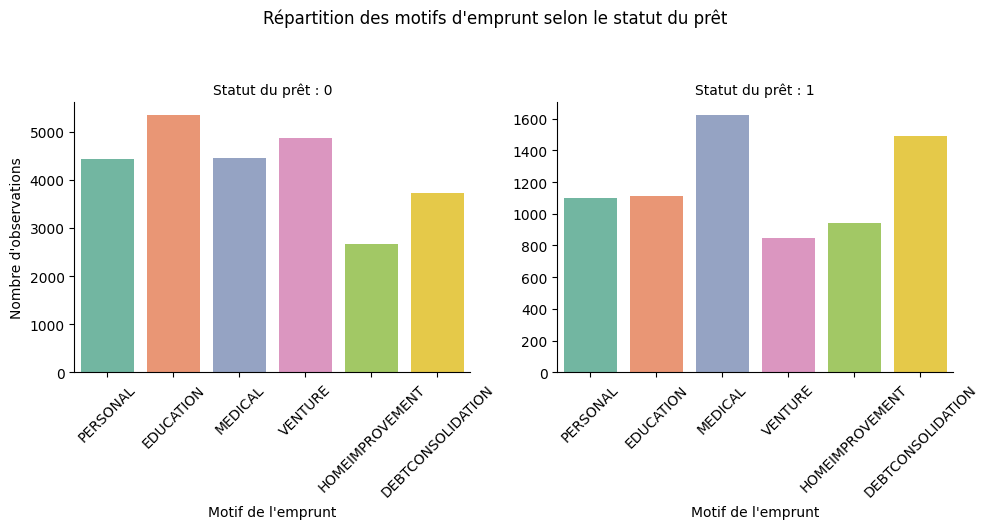

In [21]:
# Graphe facett√© par statut de pr√™t
g = sns.catplot(
    data=df,
    x="loan_intent",
    kind="count",
    hue="loan_intent",
    col="loan_status",
    col_wrap=2,         # Deux colonnes, comme ncol=2
    palette="Set2",
    sharey=False
)

# Ajustements visuels
g.set_titles("Statut du pr√™t : {col_name}")
g.set_axis_labels("Motif de l'emprunt", "Nombre d'observations")
g.set_xticklabels(rotation=45)
g.fig.suptitle("R√©partition des motifs d'emprunt selon le statut du pr√™t", y=1.05)

plt.tight_layout()
plt.show()

## Nettoyage des donn√©es

In [22]:
df_clean = df.copy()
len(df_clean)

32581


### üîç D√©tection des valeurs aberrantes (Outliers)

Au cours de l‚Äôanalyse exploratoire des donn√©es, nous avons observ√© la pr√©sence de **valeurs aberrantes** (ou *outliers*). Ces valeurs extr√™mes peuvent avoir un impact significatif sur les performances des mod√®les de Machine Learning, en biaisant l‚Äôapprentissage ou en influen√ßant excessivement certains r√©sultats. Il est donc essentiel de **les identifier puis de les traiter** de mani√®re appropri√©e.

Avant toute correction, il convient de **d√©tecter pr√©cis√©ment ces valeurs**. Il existe pour cela plusieurs m√©thodes, parmi lesquelles la m√©thode de l‚Äô**intervalle interquartile (IQR)** est l‚Äôune des plus couramment utilis√©es.

Selon cette m√©thode, une valeur est consid√©r√©e comme aberrante si elle se situe :

- **en dessous de** :  
  \[
  Q1 - 1.5 \times IQR
  \]

- **ou au-dessus de** :  
  \[
  Q3 + 1.5 \times IQR
  \]

o√π :
- \( Q1 \) : premier quartile (25·µâ percentile)
- \( Q3 \) : troisi√®me quartile (75·µâ percentile)
- \( IQR = Q3 - Q1 \) : intervalle interquartile



In [23]:
# Calcul des bornes IQR
Q1 = df_clean['person_income'].quantile(0.25)
Q3 = df_clean['person_income'].quantile(0.75)
IQR = Q3 - Q1

# Indices des valeurs aberrantes
index_outlier_income = df_clean[
    (df_clean['person_income'] < Q1 - 1.5 * IQR) | 
    (df_clean['person_income'] > Q3 + 1.5 * IQR)
].index

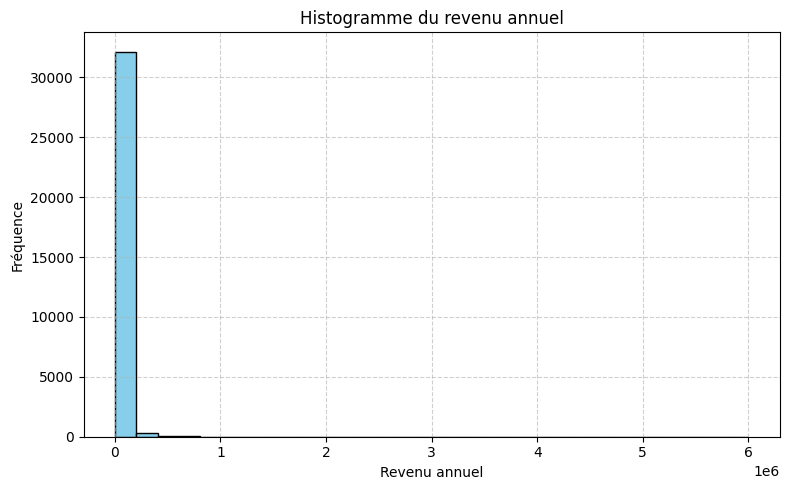

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(df_clean['person_income'], bins=30, color='skyblue', edgecolor='black')
plt.title("Histogramme du revenu annuel")
plt.xlabel("Revenu annuel")
plt.ylabel("Fr√©quence")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [25]:
df_clean = df_clean[df_clean['person_age'] < 100]

In [26]:
len(df_clean)

32576


### üîß Traitement des valeurs manquantes

Le traitement des valeurs manquantes constitue une √©tape essentielle dans le pr√©traitement des donn√©es. Deux approches principales sont g√©n√©ralement utilis√©es :

1. **La suppression des lignes** contenant des valeurs manquantes.
2. **L‚Äôimputation**, qui consiste √† remplacer les valeurs manquantes par une estimation. Les m√©thodes d‚Äôimputation les plus simples consistent √† utiliser des **statistiques descriptives** de la variable concern√©e, telles que la **moyenne**, la **m√©diane**, ou encore la **valeur la plus fr√©quente**.  

D‚Äôautres techniques plus avanc√©es peuvent √©galement √™tre employ√©es, comme l‚Äô**imputation par les k plus proches voisins (KNN)**, l‚Äôutilisation de **mod√®les pr√©dictifs**, ou encore des **techniques de r√©gression multiple**.

Dans la pratique, il est recommand√© d‚Äô**essayer plusieurs m√©thodes d‚Äôimputation**, de construire et d‚Äô√©valuer un mod√®le pour chacune, puis de **comparer leurs performances**. Cette d√©marche permet de choisir la m√©thode d‚Äôimputation la plus adapt√©e √† la nature des donn√©es et √† l‚Äôobjectif de mod√©lisation.

üîΩ **Nous allons commencer ici par une imputation par la m√©diane**, qui est une m√©thode robuste en pr√©sence de valeurs extr√™mes.


In [27]:
# Imputation de la variable 'person_emp_length' par la m√©diane
median_emp_length = df_clean['person_emp_length'].median()
df_clean['person_emp_length'].fillna(median_emp_length, inplace=True)

# Imputation de la variable 'loan_int_rate' par la m√©diane
median_loan_rate = df_clean['loan_int_rate'].median()
df_clean['loan_int_rate'].fillna(median_loan_rate, inplace=True)


/tmp/ipykernel_2307/1557028036.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['person_emp_length'].fillna(median_emp_length, inplace=True)
/tmp/ipykernel_2307/1557028036.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [28]:
# V√©rification de la variable 'person_emp_length'
print("R√©sum√© de person_emp_length :")
print(df_clean['person_emp_length'].describe())

# V√©rification de la variable 'loan_int_rate'
print("\nR√©sum√© de loan_int_rate :")
print(df_clean['loan_int_rate'].describe())


R√©sum√© de person_emp_length :
count    32576.000000
mean         4.767835
std          4.087437
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

R√©sum√© de loan_int_rate :
count    32576.000000
mean        11.009486
std          3.081794
min          5.420000
25%          8.490000
50%         10.990000
75%         13.110000
max         23.220000
Name: loan_int_rate, dtype: float64




### ‚öôÔ∏è Pr√©paration des donn√©es pour la mod√©lisation  
#### üîÑ Normalisation des variables num√©riques

Avant d'entra√Æner les mod√®les de Machine Learning, il est indispensable de pr√©parer les donn√©es afin d'optimiser leurs performances. L‚Äôune des √©tapes essentielles consiste √† **normaliser les variables num√©riques**, c‚Äôest-√†-dire √† **les ramener √† une √©chelle comparable**.

En effet, les algorithmes comme la **r√©gression logistique**, le **k plus proches voisins (KNN)**, les **r√©seaux de neurones** ou les **m√©thodes de clustering** sont sensibles aux diff√©rences d‚Äô√©chelle entre les variables. Par exemple, une variable exprim√©e en milliers (comme le revenu) peut dominer une autre exprim√©e en dizaines (comme la dur√©e d‚Äôemploi), ce qui biaise l‚Äôapprentissage.

La normalisation permet donc de :
- Centrer les donn√©es autour de **z√©ro** (moyenne nulle)
- R√©duire les √©carts autour de **1** (√©cart-type unitaire)
- **Am√©liorer la convergence** et la performance des mod√®les

La m√©thode la plus courante est la **standardisation (z-score)** :

\[
X_{\text{norm}} = \frac{X - \mu}{\sigma}
\]

o√π \( \mu \) est la moyenne de la variable et \( \sigma \) son √©cart-type.



In [29]:
df_vf = df_clean

In [30]:
#fonction de normalisation 
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())


In [31]:
# Appliquer la normalisation uniquement aux colonnes num√©riques

for col in df_vf.select_dtypes(include=['float64', 'int64']).columns:
    df_vf[col] = normalize(df_vf[col])

In [32]:
df_vf.head()

person_age  person_income person_home_ownership  person_emp_length  \
0    0.027027       0.027017                  RENT           1.000000   
1    0.013514       0.002751                   OWN           0.040650   
2    0.067568       0.002751              MORTGAGE           0.008130   
3    0.040541       0.030209                  RENT           0.032520   
4    0.054054       0.024757                  RENT           0.065041   

  loan_intent loan_grade  loan_amnt  loan_int_rate loan_status  \
0    PERSONAL          D   1.000000       0.595506           1   
1   EDUCATION          B   0.014493       0.321348           0   
2     MEDICAL          C   0.144928       0.418539           1   
3     MEDICAL          C   1.000000       0.551124           1   
4     MEDICAL          C   1.000000       0.497191           1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0             0.710843                         Y                    0.035714  
1             0.120482                         N                    0.000000  
2             0.686747                         N                    0.035714  
3             0.638554                         N                    0.000000  
4             0.662651                         Y                    0.071429

In [33]:
# D√©finir le jeu de donn√©es et la cible

X = df_vf.drop(columns='loan_status')
y = df_vf['loan_status']

# Reproducibilit√©
random_seed = 131

# Split 80% entra√Ænement / 20% test avec stratification sur la variable cible
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=random_seed
)

# Fusionner les X et y pour reconstituer les jeux complets si besoin
train_set = X_train.copy()
train_set['loan_status'] = y_train

test_set = X_test.copy()
test_set['loan_status'] = y_test

# V√©rification : nombre de lignes
print("Taille de train_set :", train_set.shape[0])
print("Taille de test_set  :", test_set.shape[0])

Taille de train_set : 26060
Taille de test_set  : 6516


üìä V√©rification de la distribution de la variable cible

In [34]:
print("Distribution dans le train set :")
print(y_train.value_counts(normalize=True))

print("\nDistribution dans le test set :")
print(y_test.value_counts(normalize=True))


Distribution dans le train set :
loan_status
0    0.781811
1    0.218189
Name: proportion, dtype: float64

Distribution dans le test set :
loan_status
0    0.781768
1    0.218232
Name: proportion, dtype: float64


## MODELISATION

In [35]:
# 1. Encodage des variables cat√©gorielles
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# ‚ö†Ô∏è S'assurer que les colonnes de train et test sont les m√™mes
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

# 2. Normalisation
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 3. Mod√®le
logreg = LogisticRegression(random_state=random_seed, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# 4. Pr√©dictions et √©valuation
y_pred = logreg.predict(X_test_scaled)

# √âvaluation
print("\n=== Regression Logistique ===")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred))


=== Regression Logistique ===
Matrice de confusion :
 [[4862  232]
 [ 646  776]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      5094
           1       0.77      0.55      0.64      1422

    accuracy                           0.87      6516
   macro avg       0.83      0.75      0.78      6516
weighted avg       0.86      0.87      0.86      6516

Accuracy : 0.8652547575199508


In [36]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=random_seed)
rf.fit(X_train_encoded, y_train)

# Pr√©dictions
y_pred_rf = rf.predict(X_test_encoded)

# √âvaluation
print("\n=== Random Forest ===")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_rf))
print("Accuracy :", accuracy_score(y_test, y_pred_rf))


=== Random Forest ===
Matrice de confusion :
 [[5071   23]
 [ 400 1022]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      5094
           1       0.98      0.72      0.83      1422

    accuracy                           0.94      6516
   macro avg       0.95      0.86      0.89      6516
weighted avg       0.94      0.94      0.93      6516

Accuracy : 0.9350828729281768


In [37]:
# Arbre de d√©cision
tree = DecisionTreeClassifier(random_state=random_seed)
tree.fit(X_train_encoded, y_train)

# Pr√©dictions
y_pred_tree = tree.predict(X_test_encoded)

# √âvaluation
print("=== Arbre de D√©cision ===")
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_tree))
print("\nRapport de classification :\n", classification_report(y_test, y_pred_tree))
print("Accuracy :", accuracy_score(y_test, y_pred_tree))

=== Arbre de D√©cision ===
Matrice de confusion :
 [[4722  372]
 [ 336 1086]]

Rapport de classification :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      5094
           1       0.74      0.76      0.75      1422

    accuracy                           0.89      6516
   macro avg       0.84      0.85      0.84      6516
weighted avg       0.89      0.89      0.89      6516

Accuracy : 0.8913443830570903


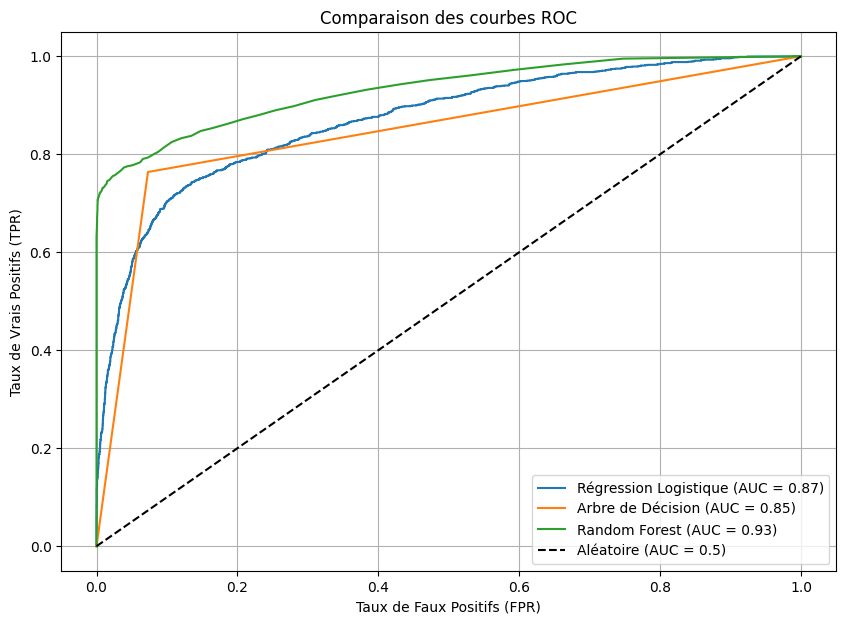

In [38]:
# Pr√©dictions des probabilit√©s
y_score_logreg = logreg.predict_proba(X_test_scaled)[:, 1]
y_score_tree = tree.predict_proba(X_test_encoded)[:, 1]
y_score_rf = rf.predict_proba(X_test_encoded)[:, 1]

# Courbes ROC
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_score_logreg, pos_label=logreg.classes_[1])
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_score_tree, pos_label=tree.classes_[1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_score_rf, pos_label=rf.classes_[1])

# AUC
auc_logreg = auc(fpr_logreg, tpr_logreg)
auc_tree = auc(fpr_tree, tpr_tree)
auc_rf = auc(fpr_rf, tpr_rf)

# Trac√©
plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f"R√©gression Logistique (AUC = {auc_logreg:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Arbre de D√©cision (AUC = {auc_tree:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Al√©atoire (AUC = 0.5)')

plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Comparaison des courbes ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## ‚úÖ Pr√©dictions + Scores de la R√©gression Logistique

In [39]:
# Obtenir les probabilit√©s de chaque classe
y_proba_logreg = logreg.predict_proba(X_test_scaled)

# Probabilit√© d'appartenance √† la classe positive (par ex. "Charged Off")
# Attention : v√©rifier l'ordre des classes avec logreg.classes_
print("Classes :", logreg.classes_)
y_scores_logreg = y_proba_logreg[:, 1]  # colonne 1 = classe positive

# Affichage des premiers scores
import pandas as pd
score_df = pd.DataFrame({
    'Vrai label': y_test.values,
    'Score (classe positive)': y_scores_logreg
})

print(score_df.head(10))

Classes : [0 1]
  Vrai label  Score (classe positive)
0          0                 0.048227
1          1                 0.982907
2          0                 0.062100
3          0                 0.003943
4          0                 0.005165
5          0                 0.287700
6          0                 0.109675
7          0                 0.138064
8          0                 0.065805
9          1                 0.907195


In [40]:
# 1. S√©parer les features
X_full = df_vf.drop(columns='loan_status')

# 2. Encodage des variables cat√©gorielles
X_full_encoded = pd.get_dummies(X_full)

# ‚ö†Ô∏è Aligner les colonnes avec l'entra√Ænement (pour g√©rer les cat√©gories absentes/nouvelles)
X_full_encoded, _ = X_full_encoded.align(X_train_encoded, join='right', axis=1, fill_value=0)

# 3. Standardisation
X_full_scaled = scaler.transform(X_full_encoded)

# 4. Pr√©dire les scores de la classe "risque"
y_full_scores = logreg.predict_proba(X_full_scaled)[:, 1]  # probabilit√© de la classe "positive"

# 5. Ajouter les scores au dataframe d'origine
df_vf['score_risque'] = y_full_scores

# Aper√ßu
print(df_vf[['loan_status', 'score_risque']].head())


  loan_status  score_risque
0           1      0.892619
1           0      0.009280
2           1      0.979783
3           1      0.770410
4           1      0.796855


In [41]:
df_vf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32576 entries, 0 to 32580
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   person_age                  32576 non-null  float64 
 1   person_income               32576 non-null  float64 
 2   person_home_ownership       32576 non-null  object  
 3   person_emp_length           32576 non-null  float64 
 4   loan_intent                 32576 non-null  object  
 5   loan_grade                  32576 non-null  object  
 6   loan_amnt                   32576 non-null  float64 
 7   loan_int_rate               32576 non-null  float64 
 8   loan_status                 32576 non-null  category
 9   loan_percent_income         32576 non-null  float64 
 10  cb_person_default_on_file   32576 non-null  object  
 11  cb_person_cred_hist_length  32576 non-null  float64 
 12  score_risque                32576 non-null  float64 
dtypes: category(1), float

In [42]:
df_vf.sample(3)

person_age  person_income person_home_ownership  person_emp_length  \
27828    0.148649       0.120838              MORTGAGE           0.113821   
20230    0.189189       0.017487              MORTGAGE           0.113821   
6163     0.040541       0.009824                  RENT           0.000000   

             loan_intent loan_grade  loan_amnt  loan_int_rate loan_status  \
27828           PERSONAL          D   0.333333       0.487079           0   
20230            VENTURE          A   0.159420       0.032022           0   
6163   DEBTCONSOLIDATION          B   0.159420       0.312921           0   

       loan_percent_income cb_person_default_on_file  \
27828             0.060241                         Y   
20230             0.180723                         N   
6163              0.301205                         N   

       cb_person_cred_hist_length  score_risque  
27828                    0.142857      0.137132  
20230                    0.107143      0.022349  
6163                     0.000000      0.554188

## cr√©ation de classes de risque

In [43]:
# D√©finir des seuils arbitraires ou par quantiles
#df_vf['classe_risque'] = pd.qcut(df_vf['score_risque'], q=3, labels=['Faible', 'Moyen', '√âlev√©'])

# Ou avec des seuils fixes 
df_vf['classe_risque'] = pd.cut(df_vf['score_risque'], bins=[0, 0.3, 0.7, 1], labels=['Faible', 'Moyen', '√âlev√©'])

# V√©rification
print(df_vf[['loan_status', 'score_risque', 'classe_risque']].head(10))


  loan_status  score_risque classe_risque
0           1      0.892619         √âlev√©
1           0      0.009280        Faible
2           1      0.979783         √âlev√©
3           1      0.770410         √âlev√©
4           1      0.796855         √âlev√©
5           1      0.028976        Faible
6           1      0.269772        Faible
7           1      0.388941         Moyen
8           1      0.172268        Faible
9           1      0.155783        Faible


In [44]:
df_vf.sample(10)

person_age  person_income person_home_ownership  person_emp_length  \
16785    0.081081       0.014000              MORTGAGE           0.065041   
21137    0.094595       0.030573                  RENT           0.056911   
23849    0.148649       0.030455              MORTGAGE           0.121951   
1483     0.067568       0.019255                  RENT           0.032520   
16054    0.054054       0.047156              MORTGAGE           0.000000   
3216     0.067568       0.024602                  RENT           0.040650   
16580    0.040541       0.028244              MORTGAGE           0.040650   
30775    0.229730       0.019992                  RENT           0.000000   
15689    0.013514       0.006877                   OWN           0.040650   
29863    0.243243       0.018666                  RENT           0.016260   

             loan_intent loan_grade  loan_amnt  loan_int_rate loan_status  \
16785  DEBTCONSOLIDATION          C   0.072464       0.438202           0   
21137            VENTURE          A   0.130435       0.020787           0   
23849           PERSONAL          A   0.275362       0.312921           0   
1483             VENTURE          B   0.020290       0.252247           0   
16054            MEDICAL          C   0.275362       0.418539           0   
3216     HOMEIMPROVEMENT          B   0.086957       0.215169           0   
16580            MEDICAL          B   0.130435       0.333708           0   
30775  DEBTCONSOLIDATION          A   0.246377       0.178090           0   
15689    HOMEIMPROVEMENT          A   0.173913       0.111236           1   
29863            MEDICAL          A   0.115942       0.067416           0   

       loan_percent_income cb_person_default_on_file  \
16785             0.108434                         Y   
21137             0.096386                         N   
23849             0.180723                         N   
1483              0.036145                         N   
16054             0.120482                         Y   
3216              0.072289                         N   
16580             0.096386                         N   
30775             0.240964                         N   
15689             0.433735                         N   
29863             0.132530                         N   

       cb_person_cred_hist_length  score_risque classe_risque  
16785                    0.035714      0.104950        Faible  
21137                    0.142857      0.026264        Faible  
23849                    0.107143      0.032662        Faible  
1483                     0.071429      0.031941        Faible  
16054                    0.071429      0.063371        Faible  
3216                     0.000000      0.109153        Faible  
16580                    0.035714      0.051821        Faible  
30775                    0.500000      0.241347        Faible  
15689                    0.035714      0.216748        Faible  
29863                    0.321429      0.100887        Faible

In [45]:
# Regrouper par classe de risque et calculer les min / max
min_max_scores = df_vf.groupby('classe_risque')['score_risque'].agg(['min', 'max']).sort_index()

print(min_max_scores)

                    min       max
classe_risque                    
Faible         0.000343  0.299972
Moyen          0.300009  0.699843
√âlev√©          0.700120  0.999715


/tmp/ipykernel_2307/1635281733.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  min_max_scores = df_vf.groupby('classe_risque')['score_risque'].agg(['min', 'max']).sort_index()


In [46]:

# Calcul du nombre de d√©fauts et du total par classe
df_vf['loan_status'] = df_vf['loan_status'].astype(int)
grouped = df_vf.groupby('classe_risque')

# Total et d√©fauts
effectifs = grouped.size()
nb_defauts = grouped['loan_status'].sum()

# Calcul du CHR comme fr√©quence
chr_freq = (nb_defauts / effectifs * 100).to_frame(name='CHR')
chr_freq['Nombre'] = effectifs
chr_freq['Nombre_defaut'] = nb_defauts

# Affichage final
chr_freq = chr_freq[['CHR', 'Nombre', 'Nombre_defaut']].sort_index()
print(chr_freq)


                     CHR  Nombre  Nombre_defaut
classe_risque                                  
Faible          8.087964   24419           1975
Moyen          50.368411    5293           2666
√âlev√©          86.138268    2864           2467


/tmp/ipykernel_2307/2028871190.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_vf.groupby('classe_risque')


## Calcul de EL, UL et de la Var_loss

In [47]:
# Si tu n'as pas encore les colonnes, en voici des exemples fictifs :
# (√† adapter avec tes propres valeurs ou mod√®les)
df_vf['pd'] = df_vf['score_risque']  # ou un mod√®le de PD d√©j√† calibr√©
df_vf['lgd'] = 0.3                   # exemple fixe : 60% de perte
df_vf['ead'] = df['loan_amnt']    # montant expos√© (ex. montant du pr√™t)

# 1. Expected Loss
df_vf['el'] = df_vf['pd'] * df_vf['lgd'] * df_vf['ead']

# 2. Expected Credit Loss (identique si court terme ou si pas pond√©r√©)
df_vf['ecl'] = df_vf['el']

df_vf['ul'] = (df_vf['pd'] * (1 - df_vf['pd']) * (df_vf['lgd'] * df_vf['ead'])**2) ** 0.5


# 3. Variance des pertes
df_vf['var_loss'] = df_vf['pd'] * (1 - df_vf['pd']) * (df_vf['lgd'] * df_vf['ead'])**2

# R√©sum√© global
total_el = df_vf['el'].sum()
total_UL = df_vf['ul'].sum()
total_var = df_vf['var_loss'].sum()

print(f"Expected Loss total : {total_el:,.2f} ‚Ç¨")
print(f"enexpected Loss total : {total_UL:,.2f} ‚Ç¨")
print(f"Variance totale des pertes : {total_var:,.2f} ‚Ç¨")


Expected Loss total : 23,198,962.53 ‚Ç¨
enexpected Loss total : 28,547,872.33 ‚Ç¨
Variance totale des pertes : 43,233,081,639.93 ‚Ç¨


## Gestion des d√©siquilibre des classes : 

‚öñÔ∏è R√©solution du d√©s√©quilibre de classe
Le d√©s√©quilibre entre les classes est un ph√©nom√®ne courant, notamment dans les probl√©matiques de scoring de cr√©dit, o√π les cas de d√©faut de paiement sont naturellement moins fr√©quents que les cas de non-d√©faut. Ce d√©s√©quilibre peut nuire √† la performance des mod√®les de classification, qui auront tendance √† favoriser la classe majoritaire.
Parmi les diff√©rentes approches pour corriger ce d√©s√©quilibre, le r√©√©chantillonnage est l‚Äôune des techniques les plus couramment utilis√©es. On distingue principalement trois m√©thodes :


üîπ 1. Sous-√©chantillonnage de la classe majoritaire (Random Under Sampling - RUS)
Cette m√©thode consiste √† r√©duire la taille de la classe majoritaire (g√©n√©ralement les non-d√©fauts) en s√©lectionnant al√©atoirement un sous-ensemble d‚Äôobservations, de mani√®re √† √©quilibrer le nombre d'exemples entre les deux classes.
‚úÖ Avantage : rapide √† mettre en ≈ìuvre
‚ö†Ô∏è Inconv√©nient : perte d‚Äôinformation significative, car de nombreuses donn√©es utiles sont supprim√©es


üîπ 2. Sur-√©chantillonnage de la classe minoritaire (Random Over Sampling - ROS)
Ici, on duplique al√©atoirement les observations de la classe minoritaire (les d√©fauts de paiement) jusqu'√† atteindre une r√©partition √©quilibr√©e avec la classe majoritaire.
‚úÖ Avantage : aucune perte d'information
‚ö†Ô∏è Inconv√©nient : cr√©ation de doublons ‚Üí risque de sur-apprentissage (overfitting)


üîπ 3. SMOTE ‚Äì Synthetic Minority Oversampling Technique
SMOTE est une m√©thode avanc√©e qui permet de g√©n√©rer de nouvelles observations synth√©tiques pour la classe minoritaire. Plut√¥t que de dupliquer des cas existants, SMOTE cr√©e de nouveaux exemples en combinant les caract√©ristiques des plus proches voisins des cas de d√©faut.
‚úÖ Avantage : enrichit la diversit√© des exemples minoritaires
‚ö†Ô∏è Inconv√©nient : risque d‚Äôintroduire du bruit ou des erreurs si les voisins utilis√©s ne sont pas repr√©sentatifs de la m√™me classe


üß† Remarque importante :
Les m√©thodes de r√©√©chantillonnage doivent strictement √™tre appliqu√©es uniquement sur les donn√©es d‚Äôentra√Ænement, jamais sur l‚Äôensemble de test. L‚Äôensemble de test doit rester repr√©sentatif de la r√©alit√© pour √©valuer la performance du mod√®le en conditions r√©elles.